# Problem Statement

**Data Description:**
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars. 

**Context**: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. 

**Attribute Information:**
All the features are geometric features extracted from the silhouette.  
All are numeric in nature.

**Objective**:  
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using raw data. 

Use Support vector machines to classify the class(y) of vehicles and find the difference of accuracy with and without PCA on predictors(X). 
Optional - Use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [0]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')


In [0]:
! ls

sample_data  vehicle.csv


In [0]:
# read the data
data = pd.read_csv('vehicle.csv')
data.head(5)

compactness  circularity  ...  hollows_ratio  class
0           95         48.0  ...            197    van
1           91         41.0  ...            199    van
2          104         50.0  ...            196    car
3           93         41.0  ...            207    van
4           85         44.0  ...            183    bus

[5 rows x 19 columns]

## Quick Look on the data given

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

Observation:  
* class column is of object dtype which we will be changing to category type for efficency
* We have 18 predictors and 1 target variable.
* Data shape: 845 x 19

In [0]:
data.describe()

compactness  circularity  ...  skewness_about.2  hollows_ratio
count   846.000000   841.000000  ...        845.000000     846.000000
mean     93.678487    44.828775  ...        188.919527     195.632388
std       8.234474     6.152172  ...          6.155809       7.438797
min      73.000000    33.000000  ...        176.000000     181.000000
25%      87.000000    40.000000  ...        184.000000     190.250000
50%      93.000000    44.000000  ...        188.000000     197.000000
75%     100.000000    49.000000  ...        193.000000     201.000000
max     119.000000    59.000000  ...        206.000000     211.000000

[8 rows x 18 columns]

Observation:
* Max and Min values of data are significantly varying hence might scaling need to be done
* All fields are numeric except class are numeric, hence, no need to convert data types
* There are missing values in many columns like circularity, distance circularity, radius ratio .. etc



In [0]:
# let's have a look on unique values in each column
temp_df = {}
for col in data.columns:
    temp_df[col] = data[col].unique()

temp_df

{'circularity': array([48., 41., 50., 44., nan, 43., 34., 36., 46., 42., 49., 55., 54.,
        56., 47., 37., 39., 53., 45., 38., 35., 40., 59., 52., 51., 58.,
        57., 33.]), 'class': [van, car, bus]
 Categories (3, object): [van, car, bus], 'compactness': array([ 95,  91, 104,  93,  85, 107,  97,  90,  86,  88,  89,  94,  96,
         99, 101,  84,  87,  83, 102,  80, 100,  82, 106,  81, 119,  78,
         92,  98, 103,  77,  73,  79, 110, 108, 109, 111, 105, 112, 116,
        113, 117, 115,  76, 114]), 'distance_circularity': array([ 83.,  84., 106.,  82.,  70.,  73.,  66.,  62.,  98.,  74.,  85.,
         79., 103.,  51.,  77., 100.,  75.,  53.,  64., 105.,  80.,  54.,
         63., 107.,  nan,  72.,  86.,  68., 104.,  87.,  76.,  81.,  71.,
        101.,  96.,  78., 108.,  91.,  89.,  94.,  92.,  60.,  57.,  65.,
         50.,  88., 109.,  95.,  90.,  58.,  69.,  47.,  40.,  59., 110.,
         93., 102., 112.,  61.,  42.,  49.,  44.,  52.,  55.]), 'elongatedness': array([42.

In [0]:
# converting 'class' col dtype to category
data['class'] = data['class'].astype('category')

In [0]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

## Missing value Analysis

In [0]:
# missing values

print('Number of Missing vales in each col:\n\n',data.isna().sum())

Number of Missing vales in each col:

 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64


In [0]:
# take a look on row of missing values
data[data.isna().any(axis=1)].head()

compactness  circularity  ...  hollows_ratio  class
5           107          NaN  ...            183    bus
9            93         44.0  ...            204    car
19          101         56.0  ...            193    car
35          100         46.0  ...            200    van
66           81         43.0  ...            184    bus

[5 rows x 19 columns]

In [0]:
# number of missing values in dataframe
print('Total Missing values: ',data.isna().sum().sum())


# total number of rows which have missing values
print('number of rows which have missing values:',data[data.isna().any(axis=1)].shape[0])
print('%age of missing values:',np.round(data[data.isna().any(axis=1)].shape[0]/data.shape[0]*100,3),'%')

Total Missing values:  41
number of rows which have missing values: 33
%age of missing values: 3.901 %


Observation:
* Total Missing values:  41
* Number of rows which have missing values: 33
* %age of missing values: 3.901 %

## Handling Miising  values

- We are going to impute missing values with median values of each column with thier respsective median value
- Will be using SimpleImputer function of sklearn as imputer

In [0]:
# imputing the missing values with median values of each column with thier respsective median value
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [0]:
imputed_data = imputer.fit_transform(data.iloc[:,:18])
new_data = pd.DataFrame(imputed_data, columns = data.columns[:18] )

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
compactness                    846 non-null float64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null float64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_rat

In [0]:
print('Missing values before: ',data.isna().sum().sum())
print('Missing values After: ',new_data.isna().sum().sum())
print('Data Shape before:',data.shape)
print('Data Shape After:',new_data.shape)


Missing values before:  41
Missing values After:  0
Data Shape before: (846, 19)
Data Shape After: (846, 18)


## Digging in data describton

* normally distribted as mean amd median has similar values
* highly skewed gives high chances of outlier
* varing scaler values need Normilization over data

In [0]:
new_data.describe().T

count        mean  ...     75%     max
compactness                  846.0   93.678487  ...  100.00   119.0
circularity                  846.0   44.823877  ...   49.00    59.0
distance_circularity         846.0   82.100473  ...   98.00   112.0
radius_ratio                 846.0  168.874704  ...  195.00   333.0
pr.axis_aspect_ratio         846.0   61.677305  ...   65.00   138.0
max.length_aspect_ratio      846.0    8.567376  ...   10.00    55.0
scatter_ratio                846.0  168.887707  ...  198.00   265.0
elongatedness                846.0   40.936170  ...   46.00    61.0
pr.axis_rectangularity       846.0   20.580378  ...   23.00    29.0
max.length_rectangularity    846.0  147.998818  ...  159.00   188.0
scaled_variance              846.0  188.596927  ...  217.00   320.0
scaled_variance.1            846.0  439.314421  ...  586.75  1018.0
scaled_radius_of_gyration    846.0  174.706856  ...  198.00   268.0
scaled_radius_of_gyration.1  846.0   72.443262  ...   75.00   135.0
skewness_about               846.0    6.361702  ...    9.00    22.0
skewness_about.1             846.0   12.600473  ...   19.00    41.0
skewness_about.2             846.0  188.918440  ...  193.00   206.0
hollows_ratio                846.0  195.632388  ...  201.00   211.0

[18 rows x 8 columns]

## Understanding Target variable
* Target variable is imbalanced 
* car category is double of the rest of two
* bus and van are in same proporsion


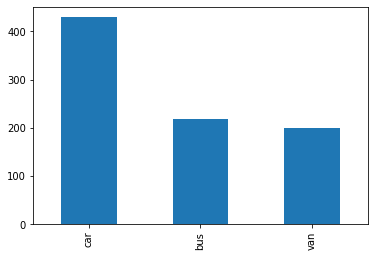

In [0]:
data['class'].value_counts().plot(kind='bar')

Observation:
* since categories are imbalnced we will be using startified sampling

# Understanding  attributes/predictors

## Histogram

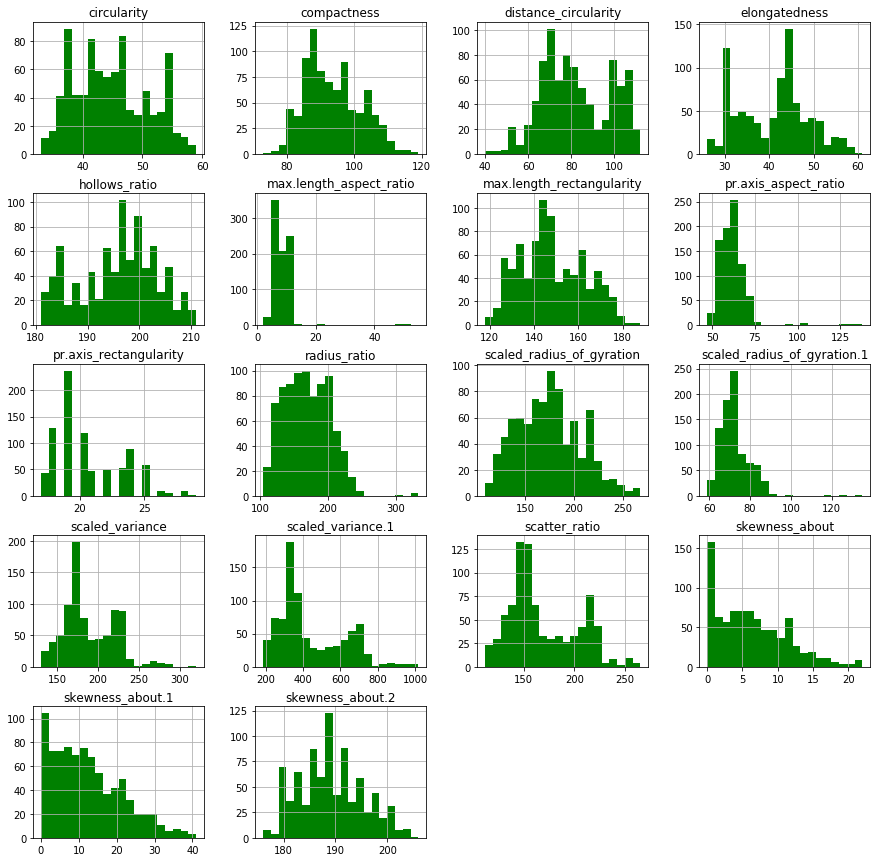

In [0]:
# plot histogram of each predicotr using in-bulit pandas hist() method
new_data.hist(bins=20, figsize=(15,15), color='g')
plt.show()

Observation:
* Most of the predicotors are normally distributed
* scaled valriance, scaled valriance 1, skewness_about 1 and 2, scatter_ratio, looks to be right skwed
* pr.axis_rectangularity,scaled_variance, and skewness_about  seems to be haing outliers ,will dig it in box plot

In [0]:
new_data.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.397572
pr.axis_aspect_ratio           3.835392
max.length_aspect_ratio        6.778394
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.655598
scaled_variance.1              0.845345
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    2.089979
skewness_about                 0.780813
skewness_about.1               0.689014
skewness_about.2               0.249985
hollows_ratio                 -0.226341
dtype: float64

Observation:
* pr.axis_aspect_ratio , max.length_aspect_ratio , and scaled_radius_of_gyration.1 are highly skewed
* skew is the degree of distortion from a normal distribution

## Boxplot

The box by itself illustrates the interquartile spread of the distribution; its length determined by the 25%(Q1) and 75%(Q3) percentiles. The vertical line inside the box marks the median ( 50% ) of the distribution.

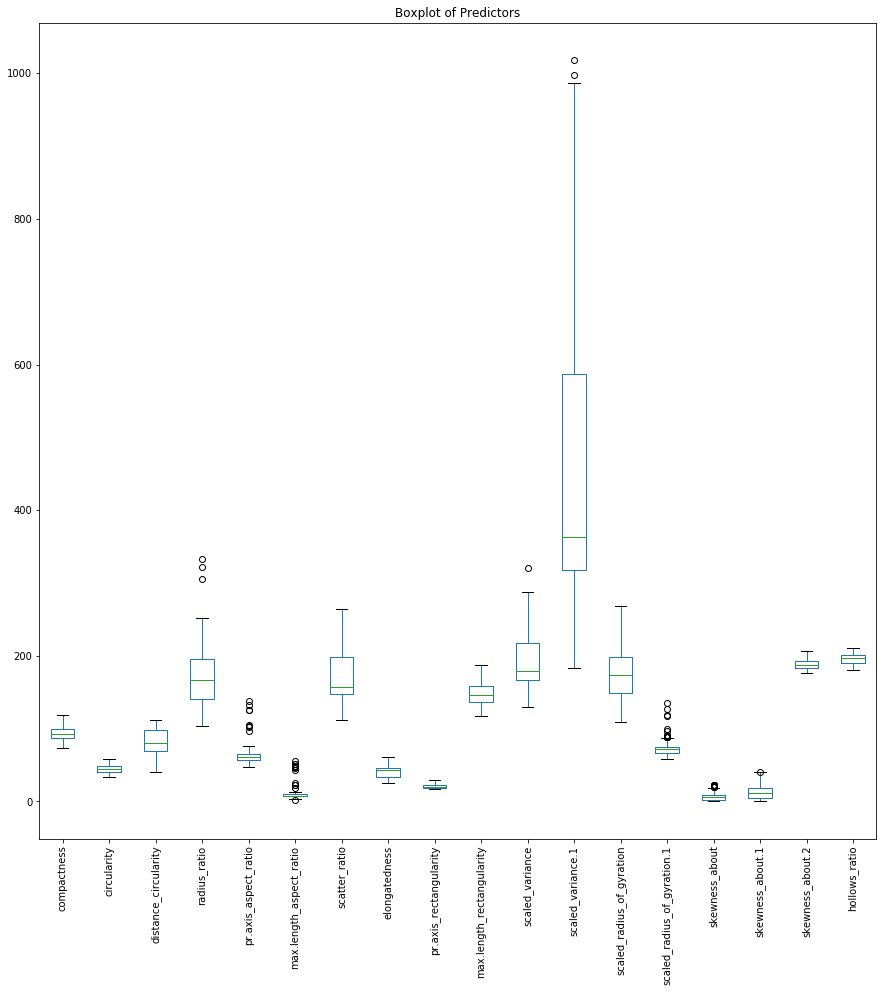

In [0]:
# ploting box plot using in-biult pandas plot() medthod
new_data.plot(kind='box', figsize=(15,15))
plt.xticks(rotation=90)
plt.title('Boxplot of Predictors')
plt.show()

Observation:
* Many of the columns have outlier, will dig seperate plot for each again
* Following are columns having outliers:
    - 'radius_ratio'
    - 'pr.axis_aspect_ratio','max.length_aspect_ratio'
    - 'scaled_variance','scaled_variance.1',
    - 'scaled_radius_of_gyration.1',
    - 'skewness_about','skewness_about.1'

In [0]:
outlier_box =['radius_ratio','pr.axis_aspect_ratio','max.length_aspect_ratio','scaled_variance','scaled_variance.1','scaled_radius_of_gyration.1','skewness_about','skewness_about.1']

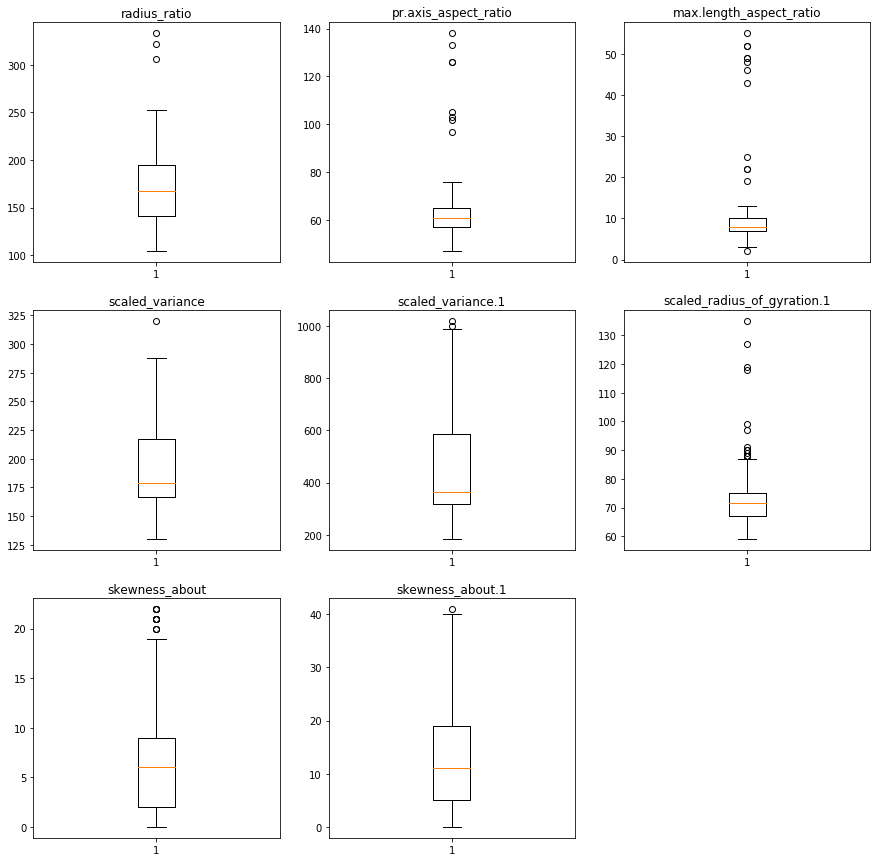

In [0]:
# plot boxplot plot for outlier data
plt.figure(figsize=(15,15))
for i, feature in enumerate(outlier_box):  
    plt.subplot(3, 3, i+1)
    plt.boxplot(new_data[feature])
    plt.title(feature)
plt.show()

In [0]:
# extracting IQR values for each predictor
def get_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

print(get_IQR(new_data))

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
dtype: float64


In [0]:
# def outlier_treatment(df,cols):
#     for col in cols:
#         Q1,Q3 = np.percentile(col , [25,75])
#         IQR = Q3 - Q1
#         lower_range = Q1 - (1.5 * IQR)
#         upper_range = Q3 + (1.5 * IQR)
        
#         df.drop(df[ (df[col] > upper_range) | (df[col] < lower_range) ].index , inplace=True)
        
#     return df



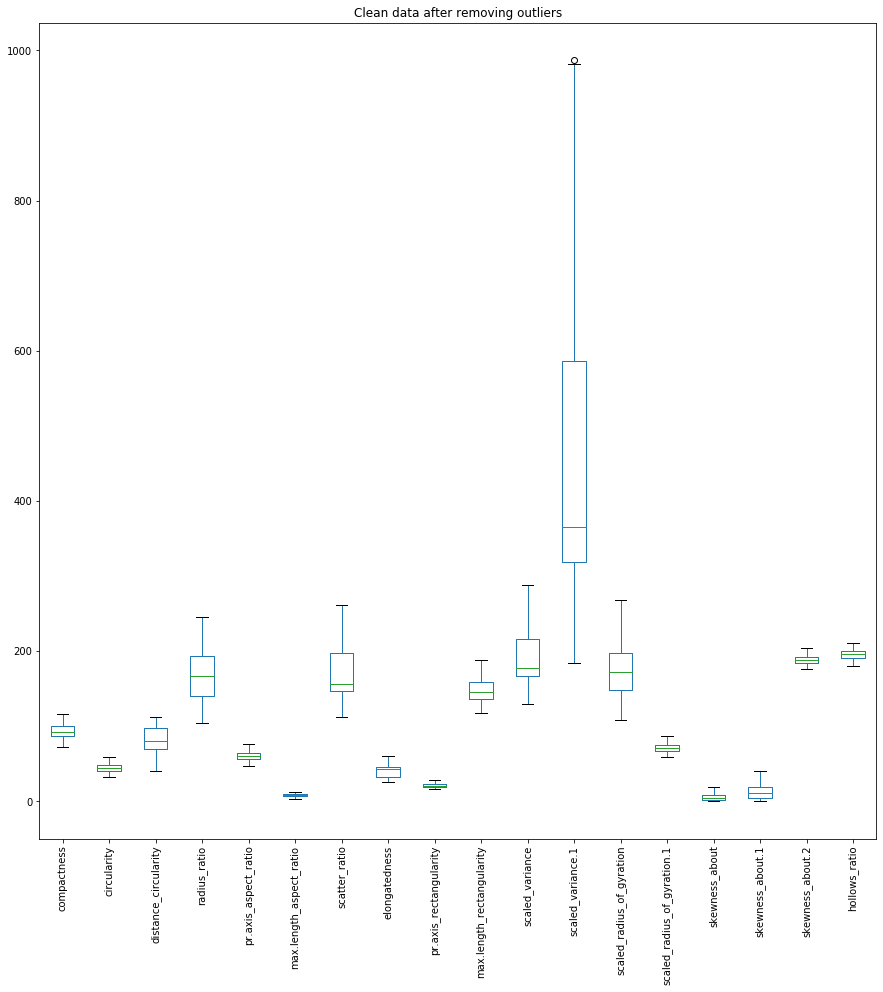

In [0]:
# dropping all of the rows which have outlier
clean_data = new_data[~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# adding 'class' column in new data after removing outliers
clean_data['class'] = data['class'][~((new_data < (Q1 - 1.5 * IQR)) |(new_data > (Q3 + 1.5 * IQR))).any(axis=1)]

# mapping target category with numeric value to feed in the model
target_col = {'bus':1,'van':2,'car':0}
clean_data['class'] = clean_data['class'].map(target_col)


# plot clean data boxplot
clean_data.plot(kind='box',figsize=(15,15))
plt.title('Clean data after removing outliers')
plt.xticks(rotation=90)
plt.show()

In [0]:
clean_data.head()

compactness  circularity  ...  hollows_ratio  class
0         95.0         48.0  ...          197.0      2
1         91.0         41.0  ...          199.0      2
2        104.0         50.0  ...          196.0      0
3         93.0         41.0  ...          207.0      2
5        107.0         44.0  ...          183.0      1

[5 rows x 19 columns]

## Correlation bewteen predictors

### Correlation Matrix

> First, we will use the method corr() on a DataFrame that calculates the correlation between each pair of features. Then, we pass the resulting correlation matrix to heatmap() from seaborn, which renders a color-coded matrix for the provided values

>  Pearson Correlation Coefficient can be used with continuous variables that have a linear relationship.

In [0]:
clean_data.corr()

compactness  ...  hollows_ratio
compactness                     1.000000  ...       0.364160
circularity                     0.679327  ...       0.039182
distance_circularity            0.786824  ...       0.321655
radius_ratio                    0.745988  ...       0.504693
pr.axis_aspect_ratio            0.200634  ...       0.419801
max.length_aspect_ratio         0.497660  ...       0.394449
scatter_ratio                   0.810842  ...       0.116181
elongatedness                  -0.788560  ...      -0.211086
pr.axis_rectangularity          0.811866  ...       0.097951
max.length_rectangularity       0.674166  ...       0.067177
scaled_variance                 0.791464  ...       0.095925
scaled_variance.1               0.812494  ...       0.103204
scaled_radius_of_gyration       0.577688  ...      -0.120579
scaled_radius_of_gyration.1    -0.253678  ...      -0.917291
skewness_about                  0.200640  ...       0.061136
skewness_about.1                0.161106  ...       0.199910
skewness_about.2                0.295414  ...       0.889946
hollows_ratio                   0.364160  ...       1.000000

[18 rows x 18 columns]

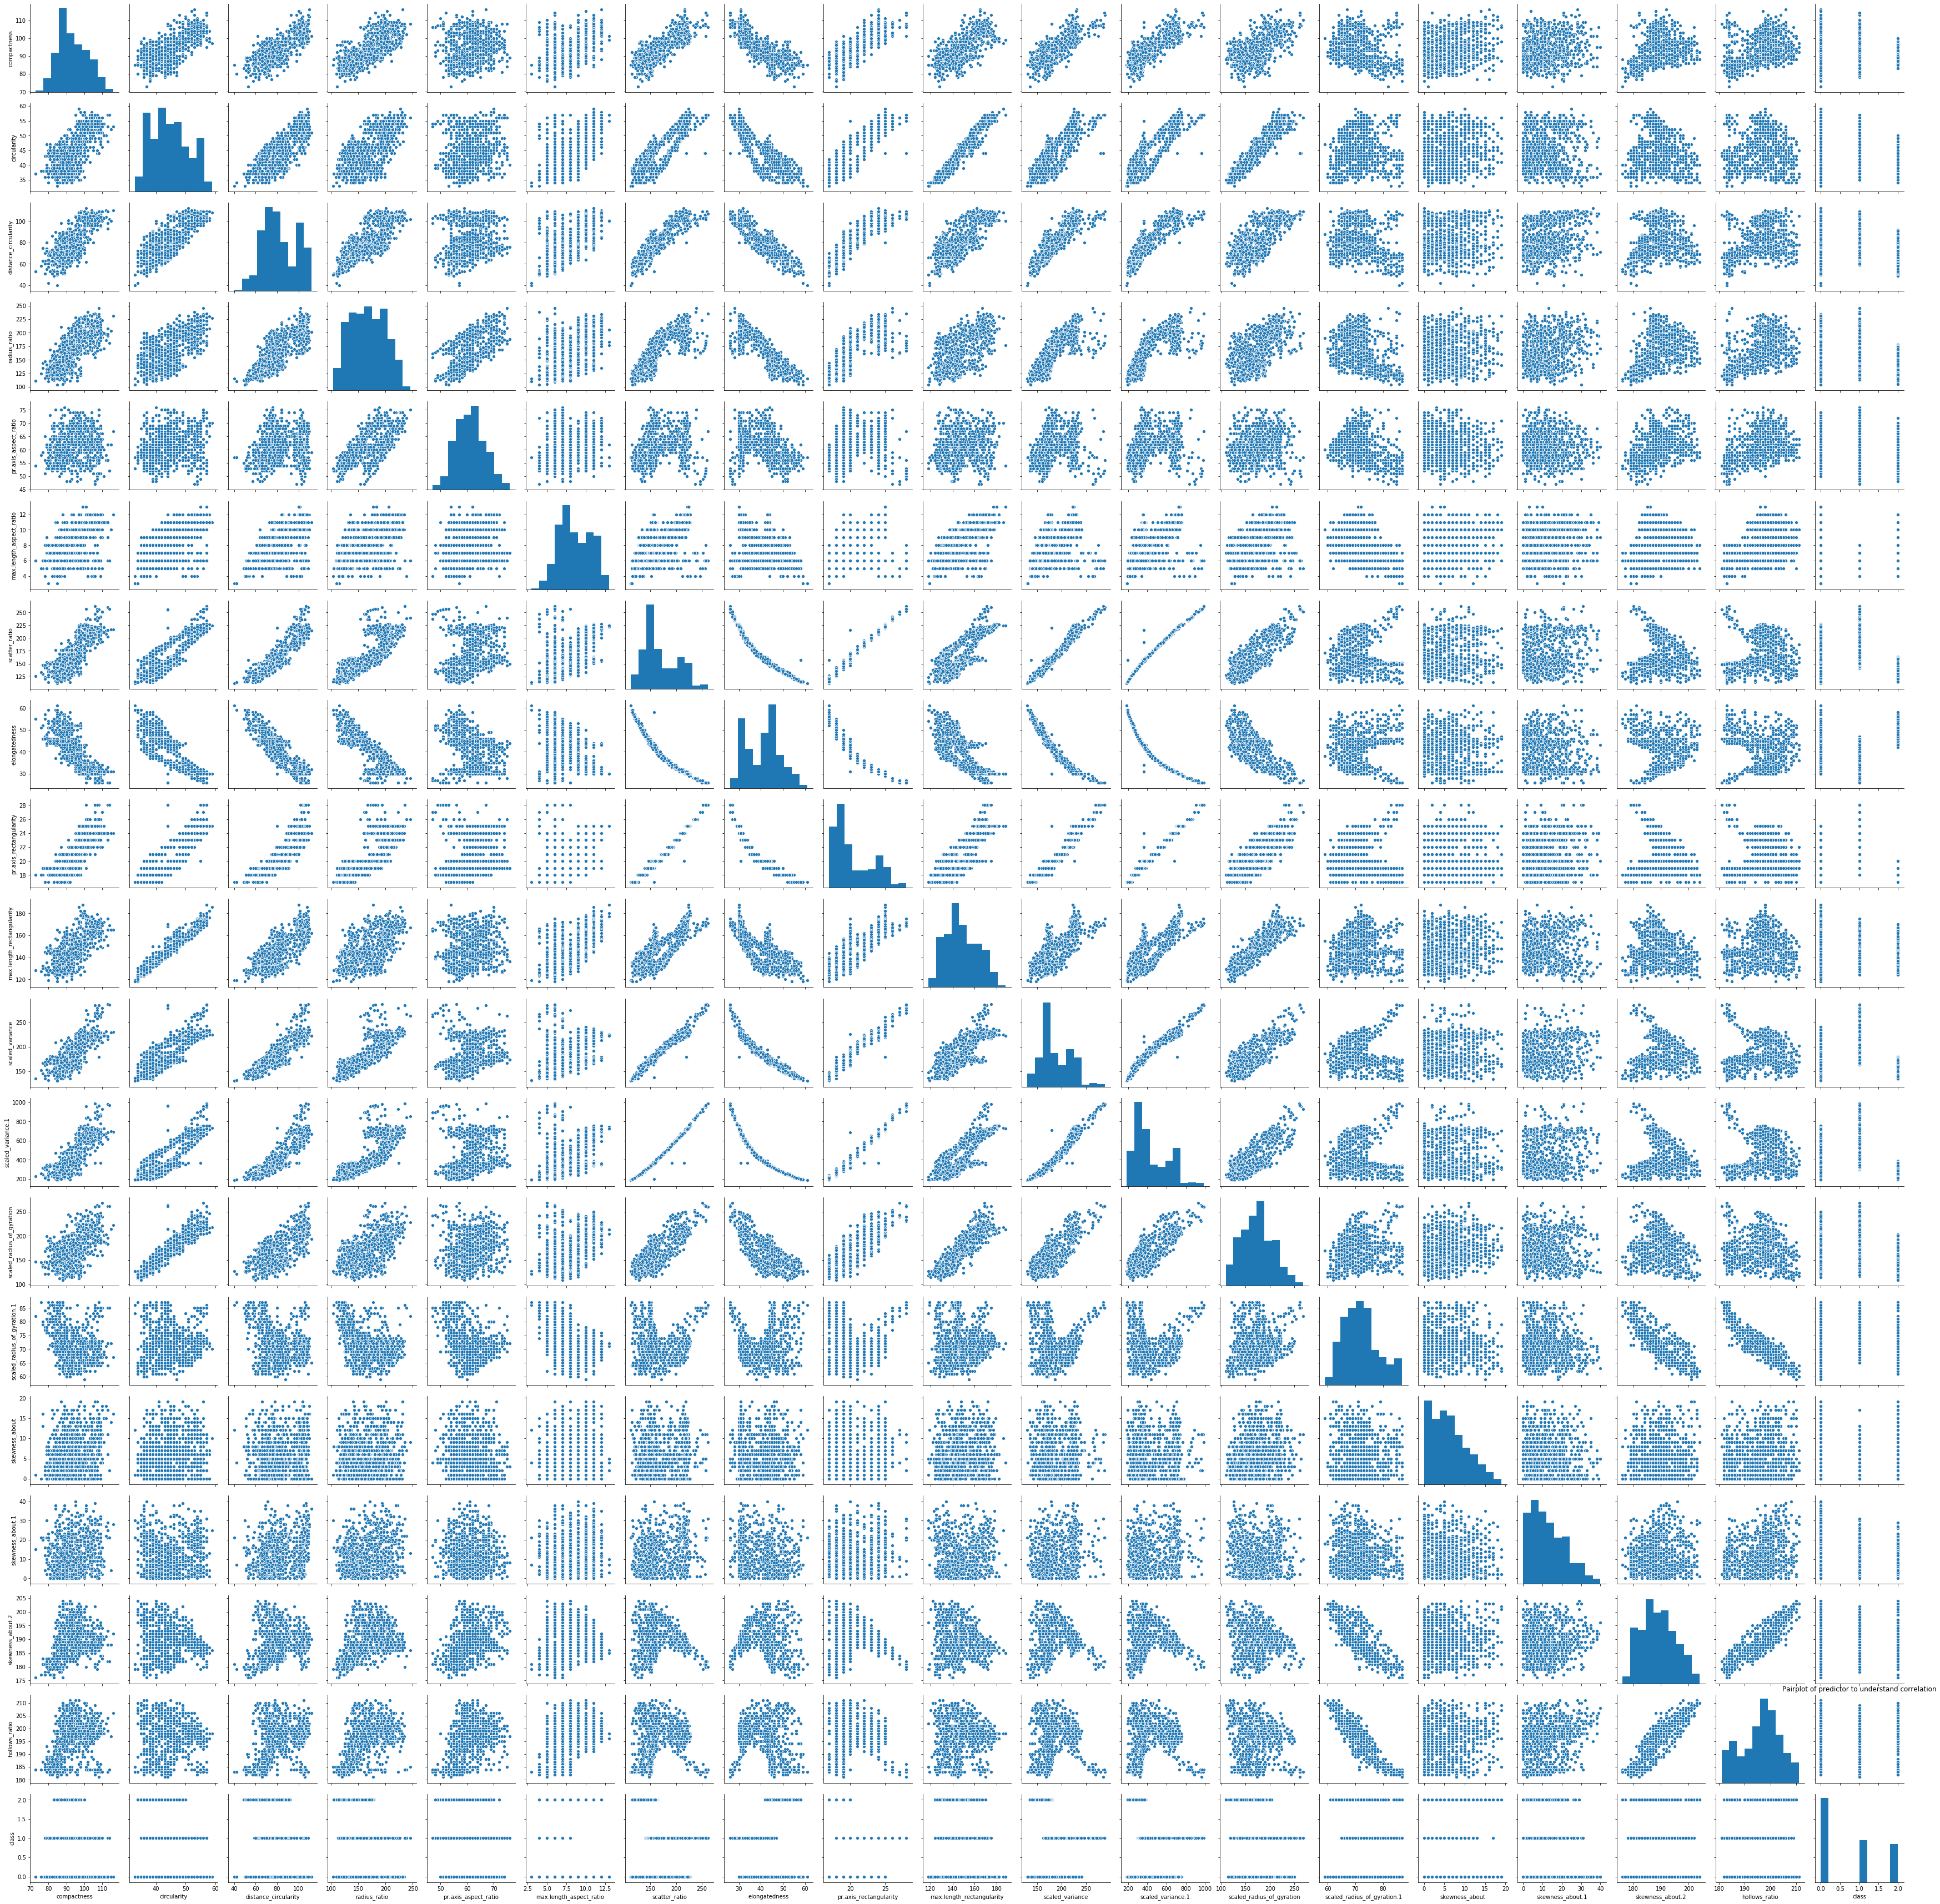

In [0]:
#Plotting pairplot to visualize the correlationship
plt.figure(figsize=(10,10))
sns.pairplot(clean_data)
plt.title('Pairplot of predictor to understand correlation')
plt.show()

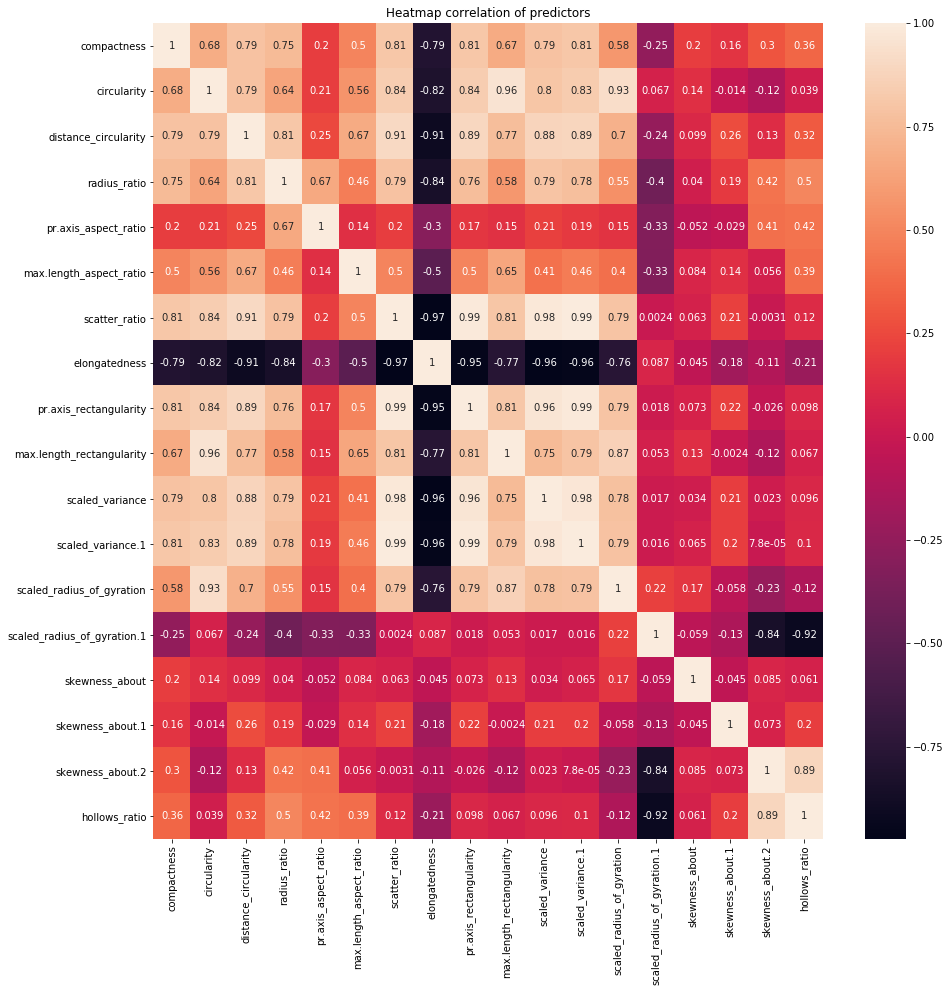

In [0]:
# plot heatmap 
plt.figure(figsize=(15,15))
sns.heatmap(clean_data.corr(),annot=True)
plt.title('Heatmap correlation of predictors')
plt.show()

Observation:
* Scaled Variance & Scaled Variance.1 are very strongly positively correlated with value of 0.98. 
* skewness_about_2 and hollow_ratio also strongly positively correlated with value of coeff: 0.89

There are 8 highly correlated columns columns:

* max.length_rectangularity
* scaled_radius_of_gyration
* skewness_about.2
* scatter_ratio
* elongatedness
* pr.axis_rectangularity
* scaled_variance
* scaled_variance.1


Our dataset has positive or negative attributes as can be obseverd from correlation analysis, there is a high chance that the performance of the model will be impacted by  “Multicollinearity”. Multicollinearity happens when one predictor variable in a multiple regression model can be linearly predicted from the others with a high degree of accuracy. This can lead to skewed or misleading results

> If two features is highly correlated then there is no point using both features.in that case, we can drop one feature.

> There are lot of dimensions with correlation above +- 0.7 and it is difficult to determine which dimensions to drop manually , therefore, we will use PCA to determine it.

# Applying PCA for multicollinearity

**Feature decomposition using Principal Component Analysis ( PCA )**

From the pair plot in Visualization, lot of feature pairs divide nicely the data to a similar extent, therefore, it makes sense to use one of the dimensionality reduction methods to try to use as many features as possible and maintian as much information as possible.

How to PCA work is in following steps:¶
1. Split our data into train and test data set
2. normalize the tarining set using standard scalar
3. Calculate the covariance matrix.
4. Calculate the eigenvectors and their eigenvalues.
5. Sort the eigenvectors according to their eigenvalues in descending order.
6. Choose the first K eigenvectors
7. Build new dataset with reduced dimensionality.

Steps 3,4,5 will be taken care by PCA() method of sklearn library.
We will plot the variance explained by all of the features and thier cumulative variance and choose value of K eigenvector as n_component parameter in PCA().

In [0]:
# import requied librabries for further process
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 813 entries, 0 to 845
Data columns (total 19 columns):
compactness                    813 non-null float64
circularity                    813 non-null float64
distance_circularity           813 non-null float64
radius_ratio                   813 non-null float64
pr.axis_aspect_ratio           813 non-null float64
max.length_aspect_ratio        813 non-null float64
scatter_ratio                  813 non-null float64
elongatedness                  813 non-null float64
pr.axis_rectangularity         813 non-null float64
max.length_rectangularity      813 non-null float64
scaled_variance                813 non-null float64
scaled_variance.1              813 non-null float64
scaled_radius_of_gyration      813 non-null float64
scaled_radius_of_gyration.1    813 non-null float64
skewness_about                 813 non-null float64
skewness_about.1               813 non-null float64
skewness_about.2               813 non-null float64
hollows_rat

Steps which we will perform for Dimension reduction :
* apply StandardScaler() on datato standardize the data and avoid baised learning
* apply PCA fit_transform() on data to get final dataset of PCA(). this step include step 3,4,5
* get the explained_variance_ratio and cumulative_explained_variance_ratio for all of the features
* plot the explained_variance andselect desiered number of features i.e. value of K eigenvectors
* again apply PCA() this time with n_component = K are parameter to get  data in only K eignenvector direction.

In [0]:
# dividing out data as predictor and target variable
predictor = clean_data.drop(['class'],axis=1)
target = clean_data['class']

In [0]:
# Normalize the  data (center around 0 and scale to remove the variance).
scaler =StandardScaler()
X_std = scaler.fit_transform(predictor)

# feature extraction using PCA
pca = PCA()
fit = pca.fit(X_std)
X_pca = fit.transform(X_std)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_
#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print('Variance: ',var,'\n\nCumulative variance:',var1)

Variance:  [5.43385012e-01 1.87386253e-01 6.70690992e-02 6.30665320e-02
 4.97324675e-02 3.65268566e-02 1.79255090e-02 1.25904175e-02
 6.25572293e-03 4.22850947e-03 3.43129149e-03 2.45487103e-03
 1.66416799e-03 1.48558789e-03 1.07943424e-03 9.83188815e-04
 5.61620004e-04 1.73459006e-04] 

Cumulative variance: [ 54.34  73.08  79.79  86.1   91.07  94.72  96.51  97.77  98.4   98.82
  99.16  99.41  99.58  99.73  99.84  99.94 100.   100.02]


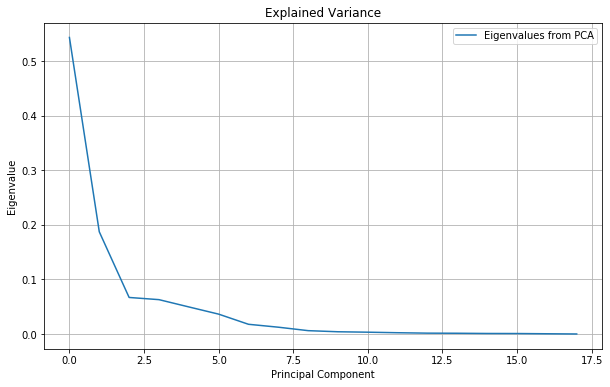

In [0]:
# plot explained_variance_ratio
plt.figure(figsize=(10,6))
plt.plot(var)
plt.title('Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
plt.show()

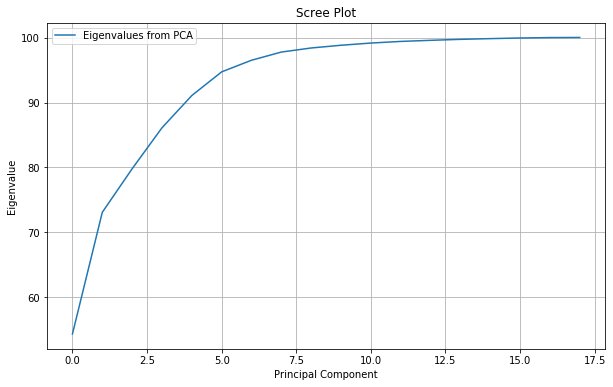

In [0]:
plt.figure(figsize=(10,6))
plt.plot(var1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
plt.grid(True)
plt.show()

**Deciding How Many Principal Components to Retain**

* In order to decide how many principal components should be retained, it is common to summarise the results of a principal components analysis by making a plot.
* Using Elbow Method to determine the right number of components to be retain.

- From above we plot we can clealry observer that 9 dimension() are able to explain 95+ %variance of data. 
- so we will use first 9 principal components going forward and calulate the reduced dimensions. 

In [0]:
# feature extraction using only 9 components
pca = PCA(n_components=9)
fit = pca.fit(X)
X_pca_final = fit.transform(X)      # returns array dtype

# get the dataframe
PCA_data = pd.DataFrame(X_pca, columns=clean_data.columns[:-1])

<Figure size 720x720 with 0 Axes>

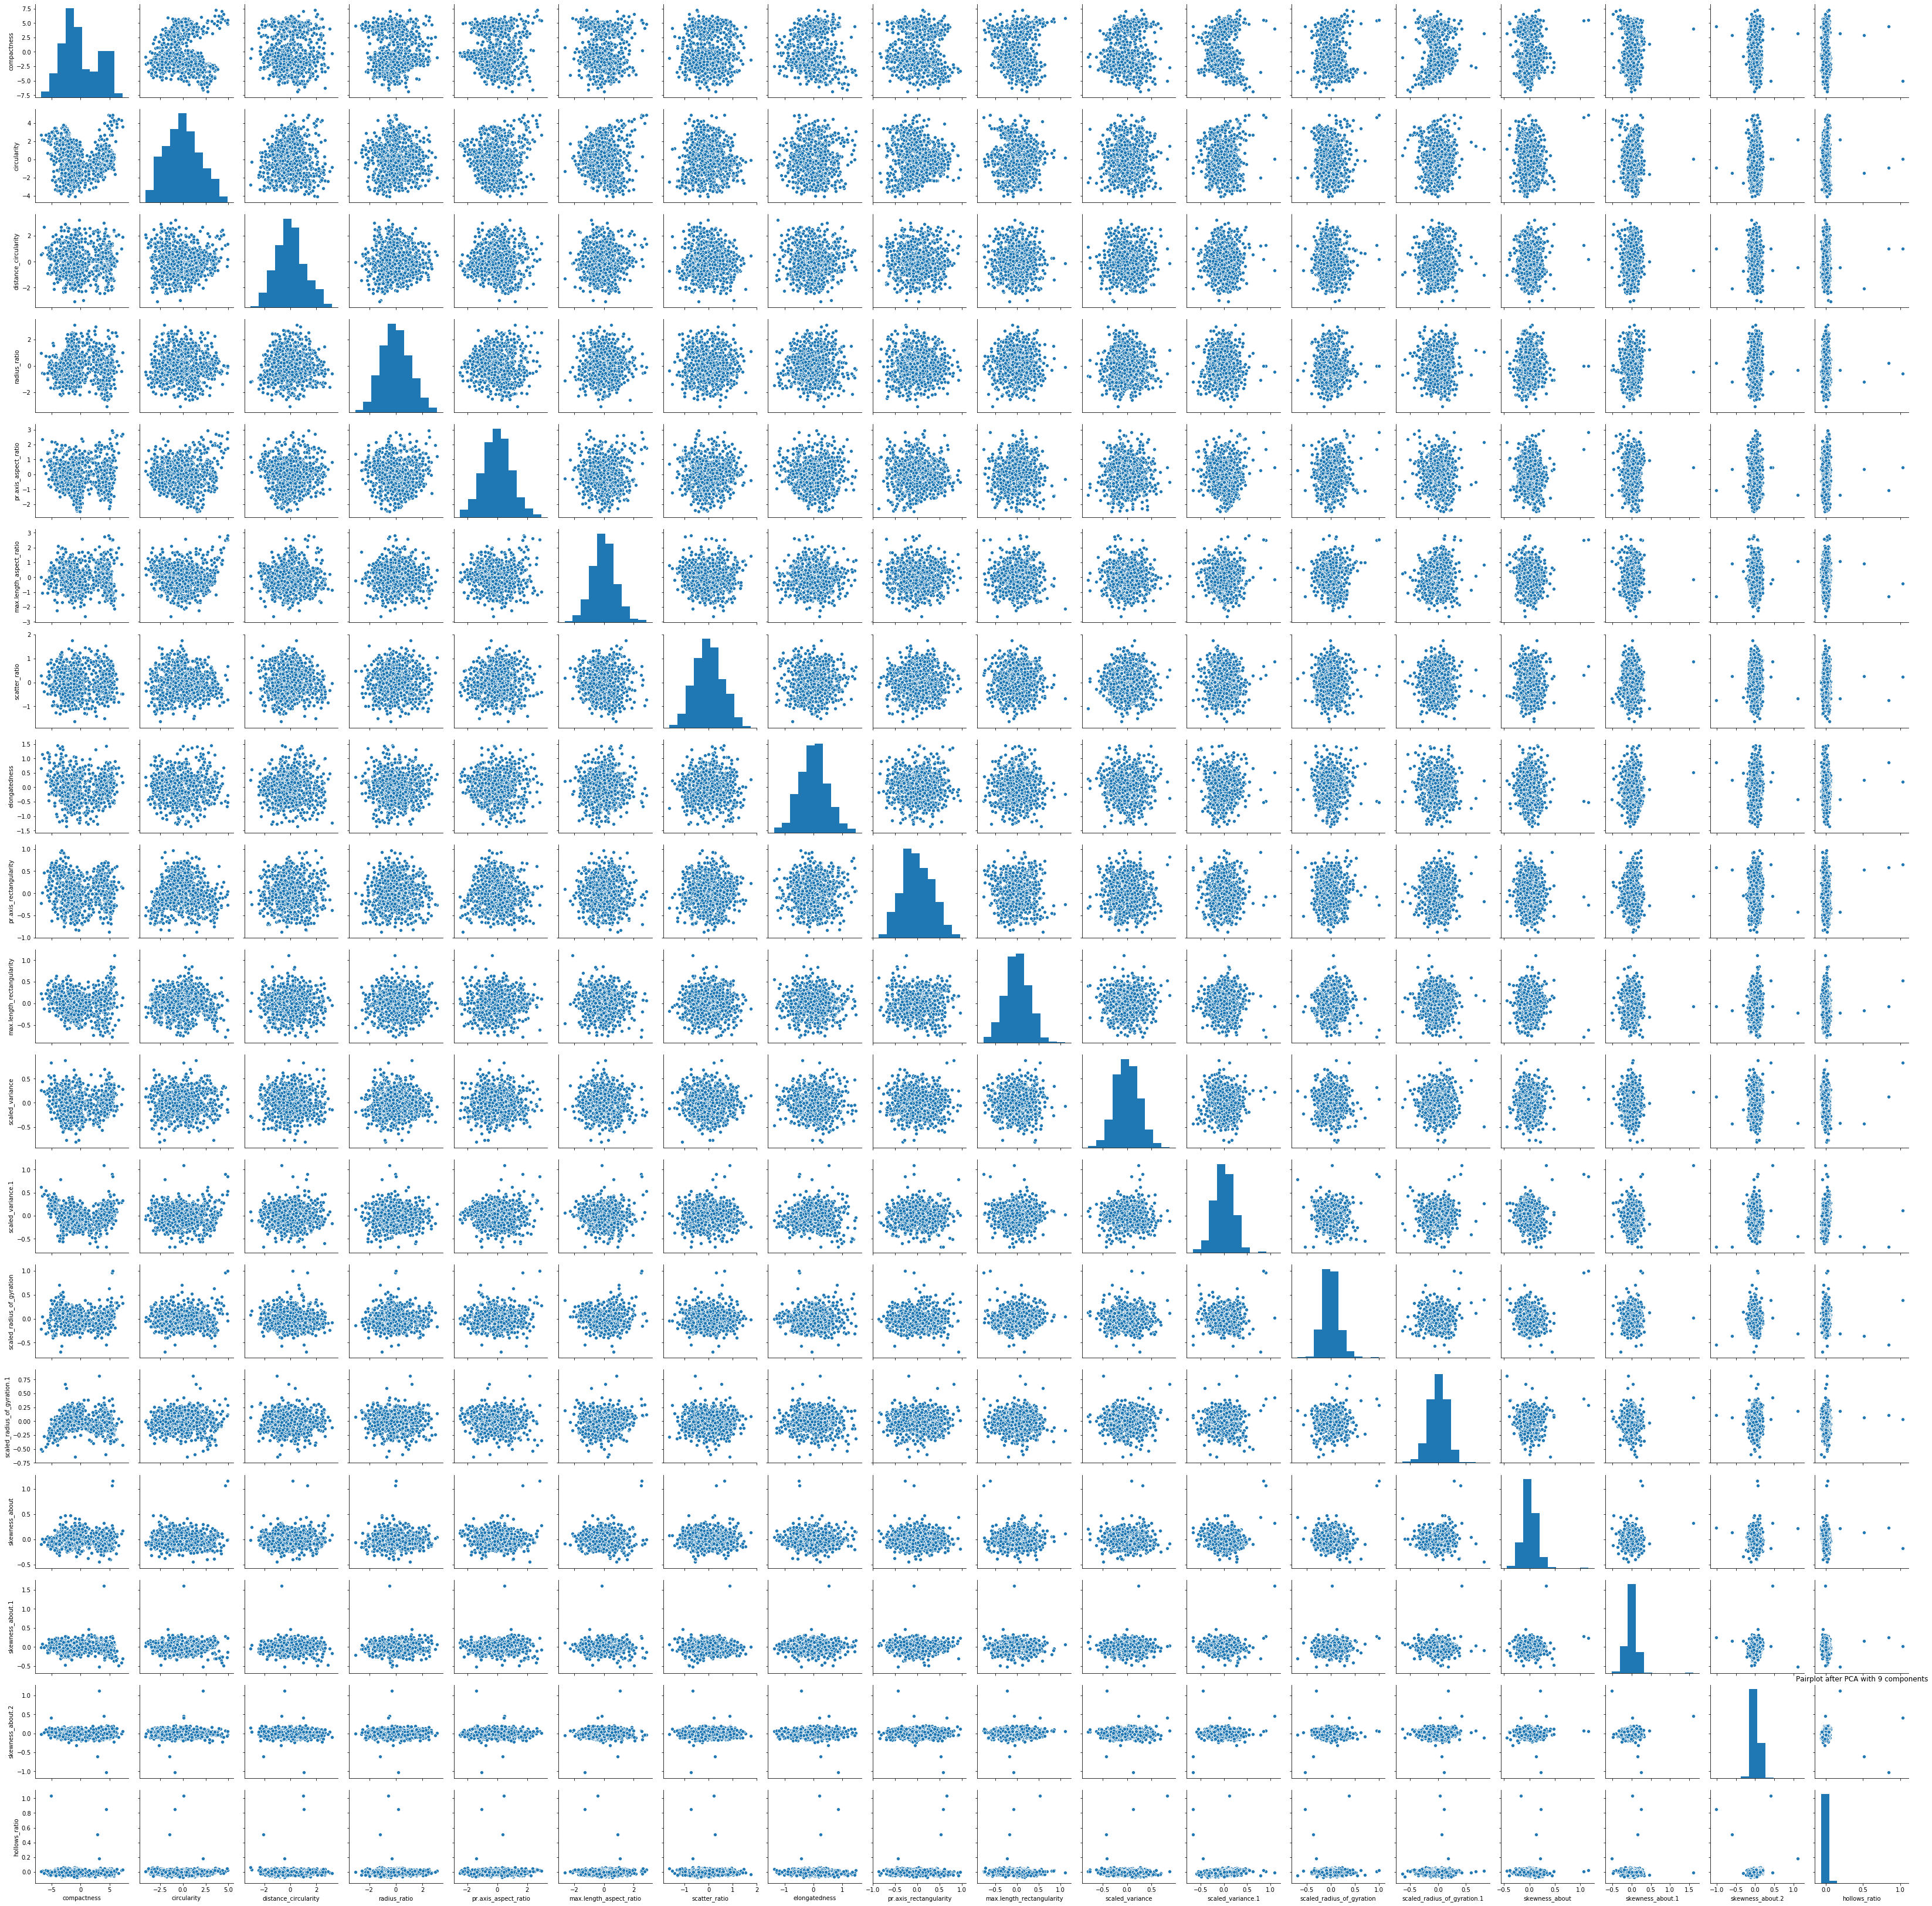

In [0]:
plt.figure(figsize=(10,10))
sns.pairplot(PCA_data)
plt.title('Pairplot after PCA with 9 components')
plt.show()

# Data Modeling

We have three type of data now
* original data with out std or PCA
* data with StandardScale
* data from PCA with 9 componenets

Now, we will divide the data using train_test_split() of sklrean and will be using stratified sampling method since we have imbalanced categories.

In [0]:
# split the data in test and train set

#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(predictor,target,test_size=0.30,random_state=1, stratify=target)

#STD orginal Data
STD_Orig_X_train,STD_Orig_X_test,STD_Orig_y_train,STD_Orig_y_test = train_test_split(X,target,test_size=0.30,random_state=1, stratify=target)

#PCA Data
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(PCA_data,target,test_size=0.30,random_state=1, stratify=target)

In [0]:
def SVM_model(X_train, X_test,y_train, y_test):
    """
    desp: perform SVC classification and print the scores , accuracy, confusion matrix, classification report

    X_train: training predictor data
    X_test: testing predictor data
    y_train: training target data
    y_test: testing target data
    """
        
    #  Create an SVM classifier and train it on 70% of the data set.
    clf = SVC()
    clf.fit(X_train, y_train)
    print('Parameters: ',clf.get_params())

    # Analyze accuracy of predictions on 30% of the holdout test sample.
    classifier_score = clf.score(X_test, y_test)
    print('\nThe classifier accuracy score is {:03.2f}\n'.format(classifier_score))
    y_pred = clf.predict(X_test)
    print(pd.crosstab( y_test, y_pred))
    print(classification_report(y_test, y_pred))


def CV_SVM(df, target, estimator, n_folds = 3):
    """
    desc: apply 3 fold cross validation  on given estimators and Get average of 3-fold cross-validation score
    """
    # Get average of 3-fold cross-validation score using an estimator.
    
    cv_error = list(cross_val_score(estimator, df, target, cv=n_folds))
    print('\nThe {}-fold cross-validation accuracy score for this classifier is {}'.format(n_folds, cv_error))
    print('Average score: {:.2f} %'.format(np.average(cv_error)))


In [0]:
# Original data
SVM_model(Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test)

estimator = SVC()
CV_SVM(predictor, target, estimator=estimator)
CV_SVM(Orig_X_train, Orig_y_train, estimator=estimator)


Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

The classifier accuracy score is 0.59

col_0    0  1   2
class            
1       53  6   3
0      105  0  20
2       24  0  33
              precision    recall  f1-score   support

           0       0.58      0.84      0.68       125
           1       1.00      0.10      0.18        62
           2       0.59      0.58      0.58        57

    accuracy                           0.59       244
   macro avg       0.72      0.51      0.48       244
weighted avg       0.69      0.59      0.53       244


The 3-fold cross-validation accuracy score for this classifier is [0.5793357933579336, 0.6051660516605166, 0.5719557195571956]
Average score: 0.59 %

The 3-fold cross-validation accuracy score fo

In [0]:
#STD original data
SVM_model(STD_Orig_X_train,STD_Orig_X_test,STD_Orig_y_train,STD_Orig_y_test)

CV_SVM(X_std, target, estimator=estimator)
CV_SVM(STD_Orig_X_train, STD_Orig_y_train, estimator=estimator)



Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

The classifier accuracy score is 0.97

col_0    0   1   2
class             
1        1  60   1
0      120   1   4
2        0   1  56
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.97      0.97      0.97        62
           2       0.92      0.98      0.95        57

    accuracy                           0.97       244
   macro avg       0.96      0.97      0.96       244
weighted avg       0.97      0.97      0.97       244


The 3-fold cross-validation accuracy score for this classifier is [0.974169741697417, 0.981549815498155, 0.9446494464944649]
Average score: 0.97 %

The 3-fold cross-validation accuracy score

In [0]:
# PCA data
SVM_model(pca_X_train,pca_X_test,pca_y_train,pca_y_test)
CV_SVM(PCA_data, target, estimator=estimator)
CV_SVM(pca_X_train, pca_y_train, estimator=estimator)



Parameters:  {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}

The classifier accuracy score is 0.97

col_0    0   1   2
class             
1        1  60   1
0      120   1   4
2        0   1  56
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       125
           1       0.97      0.97      0.97        62
           2       0.92      0.98      0.95        57

    accuracy                           0.97       244
   macro avg       0.96      0.97      0.96       244
weighted avg       0.97      0.97      0.97       244


The 3-fold cross-validation accuracy score for this classifier is [0.974169741697417, 0.981549815498155, 0.9446494464944649]
Average score: 0.97 %

The 3-fold cross-validation accuracy score

Observation:

- Both STD and PCA data is giving equal result but PCA would be prefer since dimensions are less hence faster execution
- F1 score for each class is min 97% which is good.

# Hyperparameter tuning

In [0]:
def gridSearchCV(estimator, param_grid, X_train, X_test,y_train, y_test, cv=5):
    """
    desc: returns best params after applying GridSearchCV on the given estimators
    """

    grid = GridSearchCV(estimator, param_grid=param_grid, cv=cv,verbose=1, n_jobs=-1)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(classification_report(y_test, grid.predict(X_test)))
    #create_mesh(X_train,y_train, grid)
    #interact(plot_3D, elev=[-90, 90], azip=(-180, 180), X=fixed(X_train), y=fixed(y_train))
    return grid.best_params_

# def create_mesh(X_train,y_train, clf):
#      # create a mesh to plot in
#     Xtrain = X_train[:,:2]
#     clf.fit(Xtrain,y_train )
#     x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
#     y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),  np.arange(y_min, y_max, 0.2))

#     Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

#     # Put the result into a color plot
#     Z = Z.reshape(xx.shape)
#     plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

#     # Plot also the training points
#     plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=y_train, cmap=plt.cm.copper)
#     plt.xlabel('col_1')
#     plt.ylabel('col2')
#     plt.xlim(xx.min(), xx.max())
#     plt.ylim(yy.min(), yy.max())

#     plt.show()

# from mpl_toolkits import mplot3d
# from ipywidgets import interact, fixed
# def plot_3D( X, y,elev=30, azim=30):
#     ax = plt.subplot(projection='3d')
#     r = np.exp(-(X ** 2).sum(1))
#     ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
#     ax.view_init(elev=elev, azim=azim)
#     ax.set_xlabel('x')
#     ax.set_ylabel('y')
#     ax.set_zlabel('r')


In [0]:
# defining  parameter for gridsearch

kernel_values = [ 'linear' , 'poly', 'rbf' ]
param_grid = {'C': [1,  0.05, 0.5], 'gamma': ['scale', 'auto', 0.1],'kernel': kernel_values}
#param_grid = {'C': [1], 'gamma': np.logspace(-3, 3, 4),'kernel': kernel_values}


In [0]:
# aaplying gridsearchCV on data

# original data
print('gridSearchCV on original data:')
gridSearchCV(SVC(), param_grid=param_grid, X_train=Orig_X_train,y_train= Orig_y_train, X_test=Orig_X_test, y_test=Orig_y_test)

print('\n\n\n\n')

print('gridSearchCV on STD data:')
# STD data
gridSearchCV(SVC(), param_grid=param_grid, X_train=STD_Orig_X_train,y_train= STD_Orig_y_train, X_test=Orig_X_test, y_test=Orig_y_test)

print('\n\n\n\n')

print('gridSearchCV on PCA data:')
# pca data
gridSearchCV(SVC(), param_grid=param_grid, X_train=pca_X_train,y_train= pca_y_train, X_test=Orig_X_test, y_test=Orig_y_test)

gridSearchCV on original data:
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 132 out of 135 | elapsed:    9.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    9.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 1, 'gamma': 'auto', 'kernel': 'poly'}
0.9630492159602546
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       125
           1       0.95      0.95      0.95        62
           2       0.93      0.96      0.95        57

    accuracy                           0.95       244
   macro avg       0.95      0.96      0.95       244
weighted avg       0.96      0.95      0.95       244






gridSearchCV on STD data:
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.9666200900481291
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       125
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        57

    accuracy                           0.51       244
   macro avg       0.17      0.33      0.23       244
weighted avg       0.26      0.51      0.35       244






gridSearchCV on PCA data:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.9666200900481291
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       125
           1       0.00      0.00      0.00        62
           2       0.00      0.00      0.00        57

    accuracy                           0.51       244
   macro avg       0.17      0.33      0.23       244
weighted avg       0.26      0.51      0.35       244



[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    1.4s finished


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

# Final Pipeline Model

There are standard workflows in a machine learning project that can be automated. In Python scikit-learn, Pipelines help to clearly define and automate these workflows.

* Pipelines help overcome common problems like data leakage in your test harness.
* Python scikit-learn provides a Pipeline utility to help automate machine learning workflows.
* Pipelines work by allowing for a linear sequence of data transforms to be chained together culminating in a modeling process that can be evaluated.

In [0]:
# defining parameters

svc_param = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
pca_param = {'n_components':9}

# creating pipeline steps
steps=[('StdScaler',StandardScaler()),('pca', PCA(**pca_param)), ('SVC', SVC(**svc_param))]

# create pipeline
pipeline = Pipeline(steps=steps)

In [0]:
#orginal Data
Orig_X_train,Orig_X_test,Orig_y_train,Orig_y_test = train_test_split(predictor,target,test_size=0.30,random_state=1, stratify=target)

# applying pipeline on original data which include StandardScaler, PCA, and SVC
pipeline.fit(Orig_X_train, Orig_y_train)

Pipeline(memory=None,
         steps=[('StdScaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=9,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('SVC',
                 SVC(C=100, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=0.1, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [0]:
print('Pipeline accuracy on Original data after removing outliers: ',np.round(pipeline.score(Orig_X_test, Orig_y_test)*100, 2), '%')

# aaplying cross validation on pipeline
scores = cross_val_score(estimator=pipeline,
                         X=Orig_X_train,
                         y=Orig_y_train,
                         cv=10,
                         n_jobs=-1)
print('Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('Final Accuracy on Test set: %.5f' % pipeline.score(Orig_X_test, Orig_y_test))
print('Report on Train data:\n', classification_report(Orig_y_train, pipeline.predict(Orig_X_train)))
print('Report on Test data:\n', classification_report(Orig_y_test, pipeline.predict(Orig_X_test)))


Final Model Training Accuracy: 0.942 +/- 0.027
Final Accuracy on Test set: 0.97951
Report on Train data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       146
           2       1.00      1.00      1.00       132

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

Report on Test data:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       125
           1       0.98      0.98      0.98        62
           2       0.96      0.96      0.96        57

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



In [0]:
inv_target_col = {v:k for k,v in target_col.items() }
print('Report on Train data:\n', classification_report(Orig_y_train.map(inv_target_col) , pd.Series(pipeline.predict(Orig_X_train)).map(inv_target_col)))
print('Report on Test data:\n', classification_report(Orig_y_test.map(inv_target_col), pd.Series( pipeline.predict(Orig_X_test)).map(inv_target_col)))


Report on Train data:
               precision    recall  f1-score   support

         bus       1.00      1.00      1.00       146
         car       1.00      1.00      1.00       291
         van       1.00      1.00      1.00       132

    accuracy                           1.00       569
   macro avg       1.00      1.00      1.00       569
weighted avg       1.00      1.00      1.00       569

Report on Test data:
               precision    recall  f1-score   support

         bus       0.98      0.98      0.98        62
         car       0.98      0.98      0.98       125
         van       0.96      0.96      0.96        57

    accuracy                           0.98       244
   macro avg       0.98      0.98      0.98       244
weighted avg       0.98      0.98      0.98       244



# Conclusoin:

* We have achived .98 score in f1-score column which is good
* Best parameters: 

    * svc_param = {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
    * pca_param = {'n_components':9}

* Best score on Test data: 97.951 %
